In [125]:
import os
import cv2
import numpy as np
import glob
import random
import pandas as pd
from time import time,sleep
import matplotlib.pyplot as plt

In [126]:

# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Name custom object
classes = pd.read_csv("coco.names")['person']
classes = list(classes.to_numpy())
classes.insert(0,'person')
#classes = ["MeshAntenna","Radome"]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))
font = cv2.FONT_HERSHEY_PLAIN

In [127]:
def predict(img):
    # Detecting objects
    h,w,c = img.shape       #h,w,c are the original height width and no. of channels of the original image. By doing this we get back our original image
    img = cv2.resize(img, (w,h), fx=0.4, fy=0.4)

    height, width, channels = img.shape

    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                #print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    #indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    prediciton_values = {'boxes':boxes, 'confidences':confidences, 'class_ids':class_ids}
    return prediciton_values


Original Image


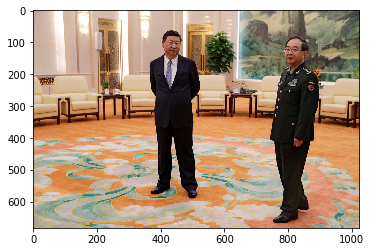

Detected Image


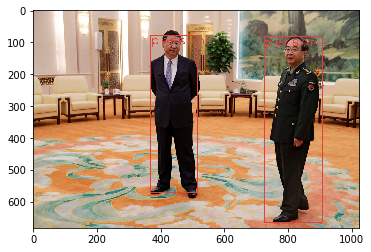

In [116]:
img = cv2.imread('person1.jpg')
orig_img = np.array(img)

prediction_values = predict(img)

# Processing Detections
#prediction_values = predict(cv2.cvtColor(frame_from_screen, cv2.COLOR_BGR2RGB))
boxes = prediction_values['boxes']
confidences = prediction_values['confidences']
class_ids = prediction_values['class_ids']

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        if label== 'person':
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)

#sys.stdout.flush()
#GUI_support.update_frame(cv2.cvtColor(frame_from_screen, cv2.COLOR_BGR2RGB))
#cv2.useOptimized()
cv2.imshow("Predictions", cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.imwrite("person1_predicted.jpg", img)
    
print("Original Image")
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.show()
print("Detected Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#print(indexes)
#print(boxes)
#print(confidences)


In [128]:
image_paths = ['p1.jpg','p2.jpg']
large_image = stich_images(image_paths)

In [129]:
def stich_images(image_paths):
    img = cv2.imread(image_paths[0])
    for i in range(len(image_paths)-1):
        temp = cv2.imread(image_paths[i+1])
        img = np.hstack((img, temp))
    return img

In [130]:
def show_all_images(image_paths):
    for i in image_paths:
        print(i)
        img = cv2.imread(i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    

In [131]:
large_image.shape

(683, 1064, 3)

In [134]:
def processing_detections(img, name='img'):
    orig_img = np.array(img)
    prediction_values = predict(img)

    # Processing Detections
    boxes = prediction_values['boxes']
    confidences = prediction_values['confidences']
    class_ids = prediction_values['class_ids']

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            if label== 'person':
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label, (x, y + 30), font, 3, color, 2)

    print("Original Image")
    plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    plt.show()
    print("Detected Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


p1.jpg


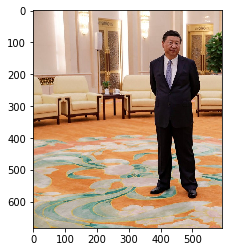

p2.jpg


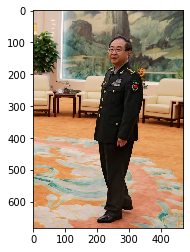

Original Image


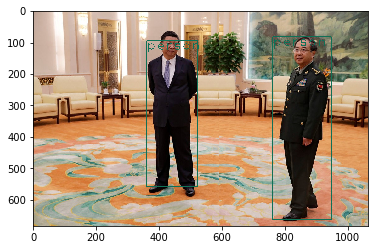

Detected Image


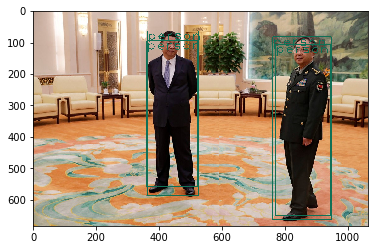

In [135]:
show_all_images(image_paths)
processing_detections(large_image)